In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
plt.style.use('default')

In [4]:
df = pd.read_csv('Mental_Health_and_Social_Media_Balance_Dataset.csv')
df.head()

,User_ID,Age,Gender,Daily_Screen_Time(hrs),Sleep_Quality(1-10),Stress_Level(1-10),Days_Without_Social_Media,Exercise_Frequency(week),Social_Media_Platform,Happiness_Index(1-10)
0,U001,44,Male,3.1,7.0,6.0,2.0,5.0,Facebook,10.0
1,U002,30,Other,5.1,7.0,8.0,5.0,3.0,LinkedIn,10.0
2,U003,23,Other,7.4,6.0,7.0,1.0,3.0,YouTube,6.0
3,U004,36,Female,5.7,7.0,8.0,1.0,1.0,TikTok,8.0
4,U005,34,Female,7.0,4.0,7.0,5.0,1.0,X (Twitter),8.0


In [5]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   User_ID                    500 non-null    object 
 1   Age                        500 non-null    int64  
 2   Gender                     500 non-null    object 
 3   Daily_Screen_Time(hrs)     500 non-null    float64
 4   Sleep_Quality(1-10)        500 non-null    float64
 5   Stress_Level(1-10)         500 non-null    float64
 6   Days_Without_Social_Media  500 non-null    float64
 7   Exercise_Frequency(week)   500 non-null    float64
 8   Social_Media_Platform      500 non-null    object 
 9   Happiness_Index(1-10)      500 non-null    float64
dtypes: float64(6), int64(1), object(3)
memory usage: 39.2+ KB


,Age,Daily_Screen_Time(hrs),Sleep_Quality(1-10),Stress_Level(1-10),Days_Without_Social_Media,Exercise_Frequency(week),Happiness_Index(1-10)
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,32.988000,5.530000,6.304000,6.618000,3.134000,2.448000,8.376000
std,9.960637,1.734877,1.529792,1.542996,1.858751,1.428067,1.524228
min,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,4.000000
25%,24.000000,4.300000,5.000000,6.000000,2.000000,1.000000,7.000000
50%,34.000000,5.600000,6.000000,7.000000,3.000000,2.000000,9.000000
75%,41.000000,6.700000,7.000000,8.000000,5.000000,3.000000,10.000000
max,49.000000,10.800000,10.000000,10.000000,9.000000,7.000000,10.000000


In [6]:
print(df.isnull().sum())

User_ID                      0
Age                          0
Gender                       0
Daily_Screen_Time(hrs)       0
Sleep_Quality(1-10)          0
Stress_Level(1-10)           0
Days_Without_Social_Media    0
Exercise_Frequency(week)     0
Social_Media_Platform        0
Happiness_Index(1-10)        0
dtype: int64


In [7]:
df = df.drop_duplicates()

In [8]:
numeric_cols = ['Age','Daily_Screen_Time(hrs)','Sleep_Quality(1-10)','Stress_Level(1-10)',
'Days_Without_Social_Media','Exercise_Frequency(week)','Happiness_Index(1-10)']


df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')

In [10]:
for col in numeric_cols:
    df[col] = df[col].fillna(df[col].median())

In [11]:
df['Gender'] = df['Gender'].astype('category')
df['Social_Media_Platform'] = df['Social_Media_Platform'].astype('category')

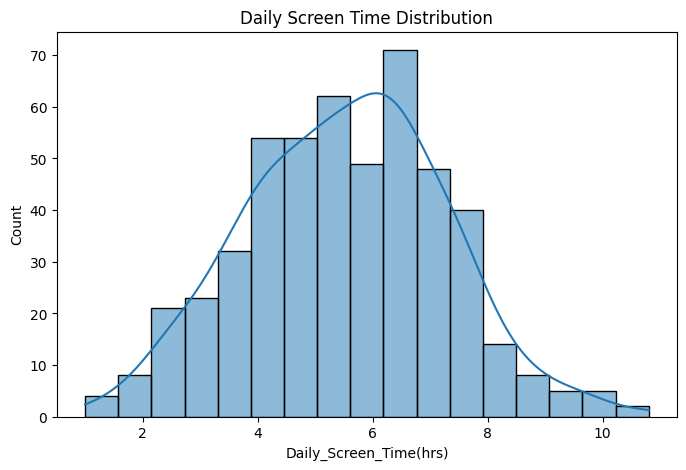

In [12]:
plt.figure(figsize=(8,5))
sns.histplot(df['Daily_Screen_Time(hrs)'], kde=True)
plt.title('Daily Screen Time Distribution')
plt.show()

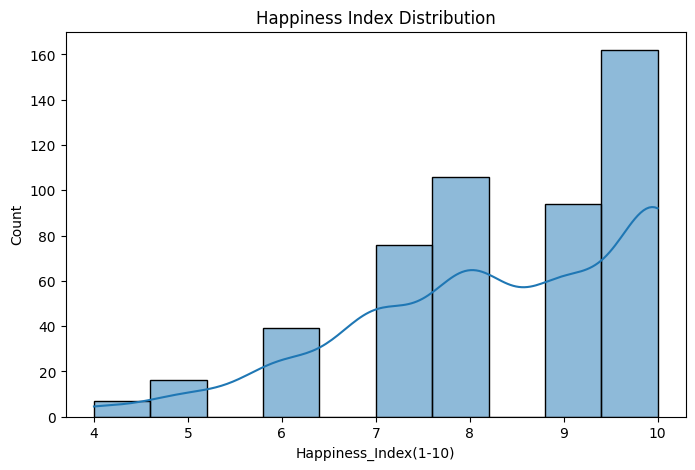

In [13]:
plt.figure(figsize=(8,5))
sns.histplot(df['Happiness_Index(1-10)'], kde=True)
plt.title('Happiness Index Distribution')
plt.show()

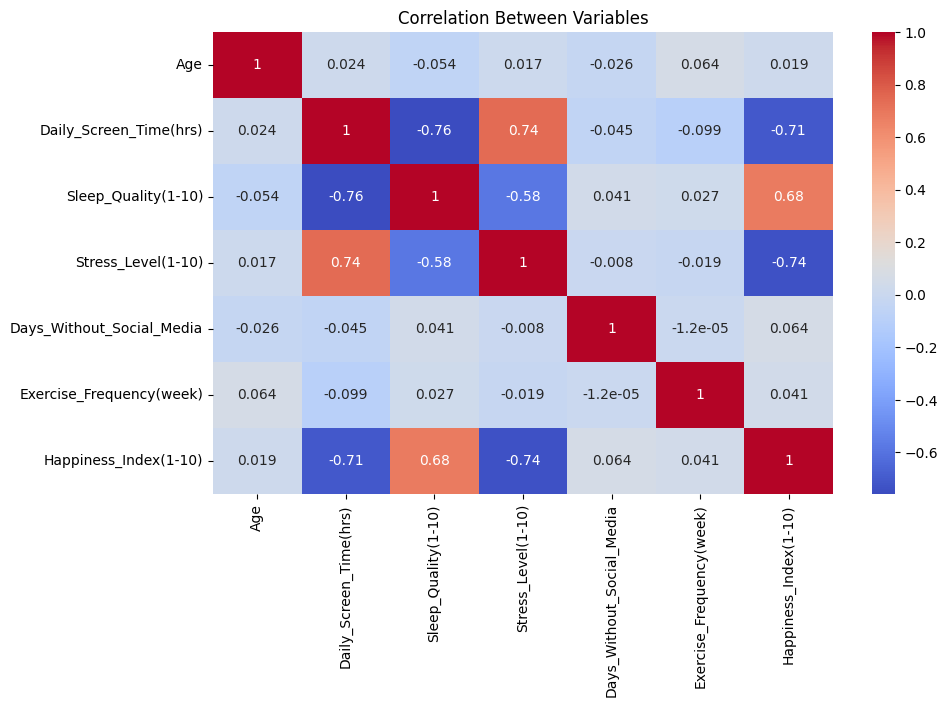

In [14]:
plt.figure(figsize=(10,6))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Between Variables')
plt.show()

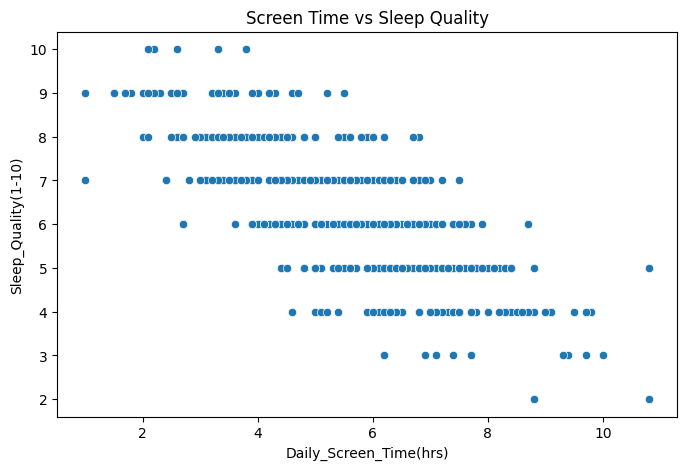

In [15]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='Daily_Screen_Time(hrs)', y='Sleep_Quality(1-10)', data=df)
plt.title('Screen Time vs Sleep Quality')
plt.show()

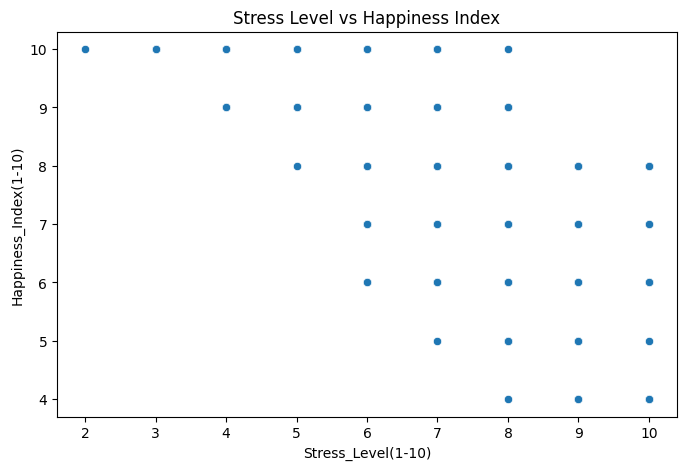

In [16]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='Stress_Level(1-10)', y='Happiness_Index(1-10)', data=df)
plt.title('Stress Level vs Happiness Index')
plt.show()

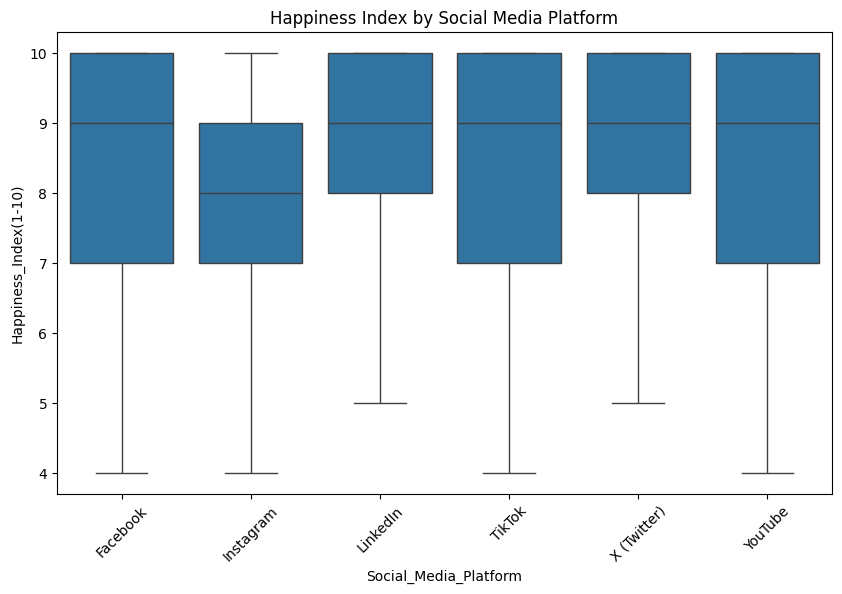

In [17]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Social_Media_Platform', y='Happiness_Index(1-10)', data=df)
plt.xticks(rotation=45)
plt.title('Happiness Index by Social Media Platform')
plt.show()

In [18]:
gender_happiness = df.groupby('Gender')['Happiness_Index(1-10)'].mean()
print(gender_happiness)

Gender
Female    8.366812
Male      8.346774
Other     8.782609
Name: Happiness_Index(1-10), dtype: float64


C:\Users\veena\AppData\Local\Temp\ipykernel_25932\3128689292.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gender_happiness = df.groupby('Gender')['Happiness_Index(1-10)'].mean()


In [19]:
platform_count = df['Social_Media_Platform'].value_counts()
print(platform_count)

Social_Media_Platform
TikTok         95
X (Twitter)    88
LinkedIn       87
Facebook       81
YouTube        75
Instagram      74
Name: count, dtype: int64


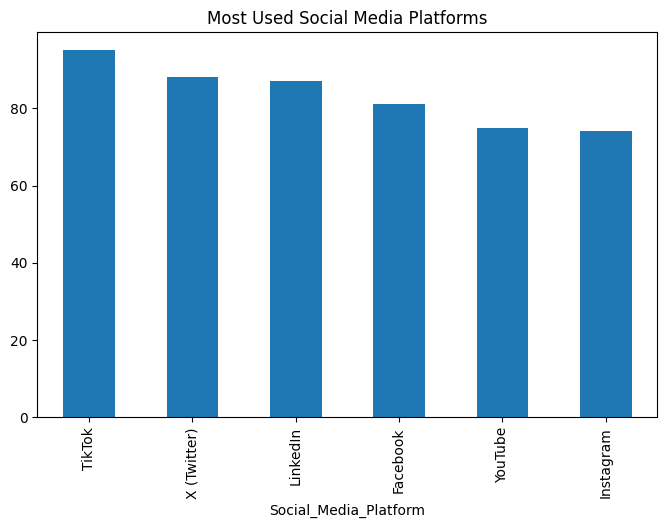

In [20]:
plt.figure(figsize=(8,5))
platform_count.plot(kind='bar')
plt.title('Most Used Social Media Platforms')
plt.show()

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [32]:
X = df[['Daily_Screen_Time(hrs)','Stress_Level(1-10)','Sleep_Quality(1-10)']]
y = df['Happiness_Index(1-10)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("\nModel Coefficients:", model.coef_)
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))


Model Coefficients: [-0.06042848 -0.47621921  0.34768755]
Mean Squared Error: 0.9287513233230018
R2 Score: 0.6090455786651786
